In [13]:
#Import Libraries and Test Dataset

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import numpy as np

#LOAD AND VIEW DATASET
#Change name of CSV to match desired dataset

fifteen_min = pd.read_csv('PTB7_LargeDataSetAll3.csv')
fifteen_min.head()

,Labels,1000.874,1002.803,1004.731,1006.66,1008.588,1010.517,1012.445,1014.373,1016.302,...,3384.459,3386.387,3388.316,3390.244,3392.173,3394.101,3396.03,3397.958,3399.887,3401.815
0,1,-0.001280,0.00353,0.01088,0.01998,0.02737,0.03143,0.03216,0.02972,0.02574,...,0.000167,0.000134,0.000205,0.000394,0.000452,0.000405,0.000466,0.000458,0.000307,0.000021
1,1,-0.003390,0.00214,0.01026,0.02010,0.02786,0.03319,0.03595,0.03603,0.03445,...,0.000077,-0.000075,-0.000113,0.000229,0.000563,0.000662,0.000720,0.000802,0.000620,0.000442
2,1,-0.000419,0.00483,0.01240,0.02203,0.03012,0.03459,0.03513,0.03220,0.02720,...,0.000161,0.000096,0.000097,0.000220,0.000204,0.000148,0.000240,0.000163,0.000103,0.000140
3,2,-0.001400,0.00371,0.01081,0.01928,0.02630,0.03073,0.03243,0.03154,0.02888,...,-0.000008,0.000062,0.000073,0.000268,0.000515,0.000601,0.000723,0.000683,0.000424,0.000264
4,2,-0.000675,0.00422,0.01137,0.02057,0.02852,0.03337,0.03454,0.03270,0.02902,...,0.000079,0.000228,0.000279,0.000516,0.000677,0.000549,0.000527,0.000593,0.000396,0.000068


In [14]:
#Define how many PCA components to calculate for Training Dataset and export to CSV on desktop
#Columns match the number of PCAs, index matches number of samples in Training Dataset
#IMPORTANT: Make sure CSV is in working directory

X = fifteen_min.values[:, 1:]
y = fifteen_min.values[:, 0].astype('uint8')
pca = PCA(n_components=40)
X_r = pca.fit(X).transform(X)


columns = [f'col_{num}' for num in range(40)]
index = [f'index_{num}' for num in range(132)]
df2 = pd.DataFrame(X_r, columns=columns, index=y)

df2.to_csv("pcascores_TEST.csv")


#Show the explained variation per PCA calculated for Training Dataset

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [5.07375755e-01 2.16583926e-01 1.37251485e-01 5.01576499e-02
 2.91240416e-02 2.06655947e-02 1.77644537e-02 5.88227205e-03
 5.44869337e-03 2.85034333e-03 2.11695485e-03 1.39995169e-03
 1.05271306e-03 8.30319483e-04 2.58497587e-04 2.31451093e-04
 1.96124682e-04 1.38645592e-04 1.17331778e-04 8.75428283e-05
 8.19870067e-05 5.49052501e-05 4.34501143e-05 3.41149940e-05
 3.25706980e-05 2.94489397e-05 2.55577066e-05 2.19986221e-05
 1.76576684e-05 1.51403499e-05 1.32126722e-05 1.16895046e-05
 1.11579427e-05 8.39530521e-06 7.94080816e-06 7.02440863e-06
 5.68785579e-06 5.24033417e-06 4.01944492e-06 3.56647753e-06]


In [15]:
#Import the PCA scores of the Training Dataset from the CSV created in the steps above

pca_scores = pd.read_csv('pcascores_TEST.csv')
pca_scores.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39
0,1,0.972375,-0.327804,0.522062,0.027832,-0.075081,0.029993,0.055804,0.007452,-0.012831,...,0.003063,-0.001030,-0.003108,0.002162,-0.004929,0.002023,-0.001707,0.010167,-0.000390,0.003414
1,1,0.835473,-0.396319,0.884121,-0.184155,-0.043270,0.179819,0.030687,-0.031667,-0.103759,...,0.002303,0.001848,-0.005385,-0.004986,0.000940,0.002543,-0.000559,0.001797,0.002207,-0.001789
2,1,0.964087,-0.353418,0.408148,0.089366,-0.140224,-0.085635,0.110259,0.026946,-0.018358,...,0.009665,0.001237,-0.009257,0.003111,-0.001908,0.003097,0.002383,-0.003845,-0.002057,0.004097
3,2,0.626022,-0.271657,0.702070,-0.255360,-0.190988,-0.082518,0.045726,0.159693,-0.067764,...,-0.001293,0.009111,0.002880,-0.003537,-0.002204,0.002562,-0.001383,0.000879,-0.000075,-0.001556
4,2,0.675846,-0.319427,0.461037,-0.309831,-0.196135,-0.173211,0.078836,0.162075,0.077713,...,0.005937,-0.004993,-0.001433,0.001780,0.001902,-0.003856,-0.001353,0.000098,0.002955,0.000334


In [16]:
#Import CSV with spectral data from unknown sample or samples and calculate PCA values
#First row is wavenumber value, subsequent rows are absorption values

X_test = pd.read_csv('KellenDataAllPaper4.csv')

X_test.head()

pca_unk = pca.transform(X_test)


In [17]:
#Export calculated PCA values from unknown sample or samples to CSV on desktop
#IMPORTANT: Open file and delete first column and row!

df3 = pd.DataFrame(pca_unk)

df3.to_csv("pca_scoresKellenDataAll-TEST.csv")

In [18]:
#Import library for LDA
#Define how many linear discriminants to be calculated from the PCA values of training data

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

y = pca_scores.values[:, 0].astype('uint8')
X = pca_scores.values[:, 1:]

lda = LDA(n_components=10)
Xlda = lda.fit_transform(X, y)


The mean accuracy is: 99.74358974358975%
Explained variation per linear discriminant: [9.67930730e-01 2.64586537e-02 3.68449261e-03 6.87134981e-04
 4.56680548e-04 2.74696644e-04 1.78684953e-04 1.45299442e-04
 1.15403075e-04 6.82239922e-05]


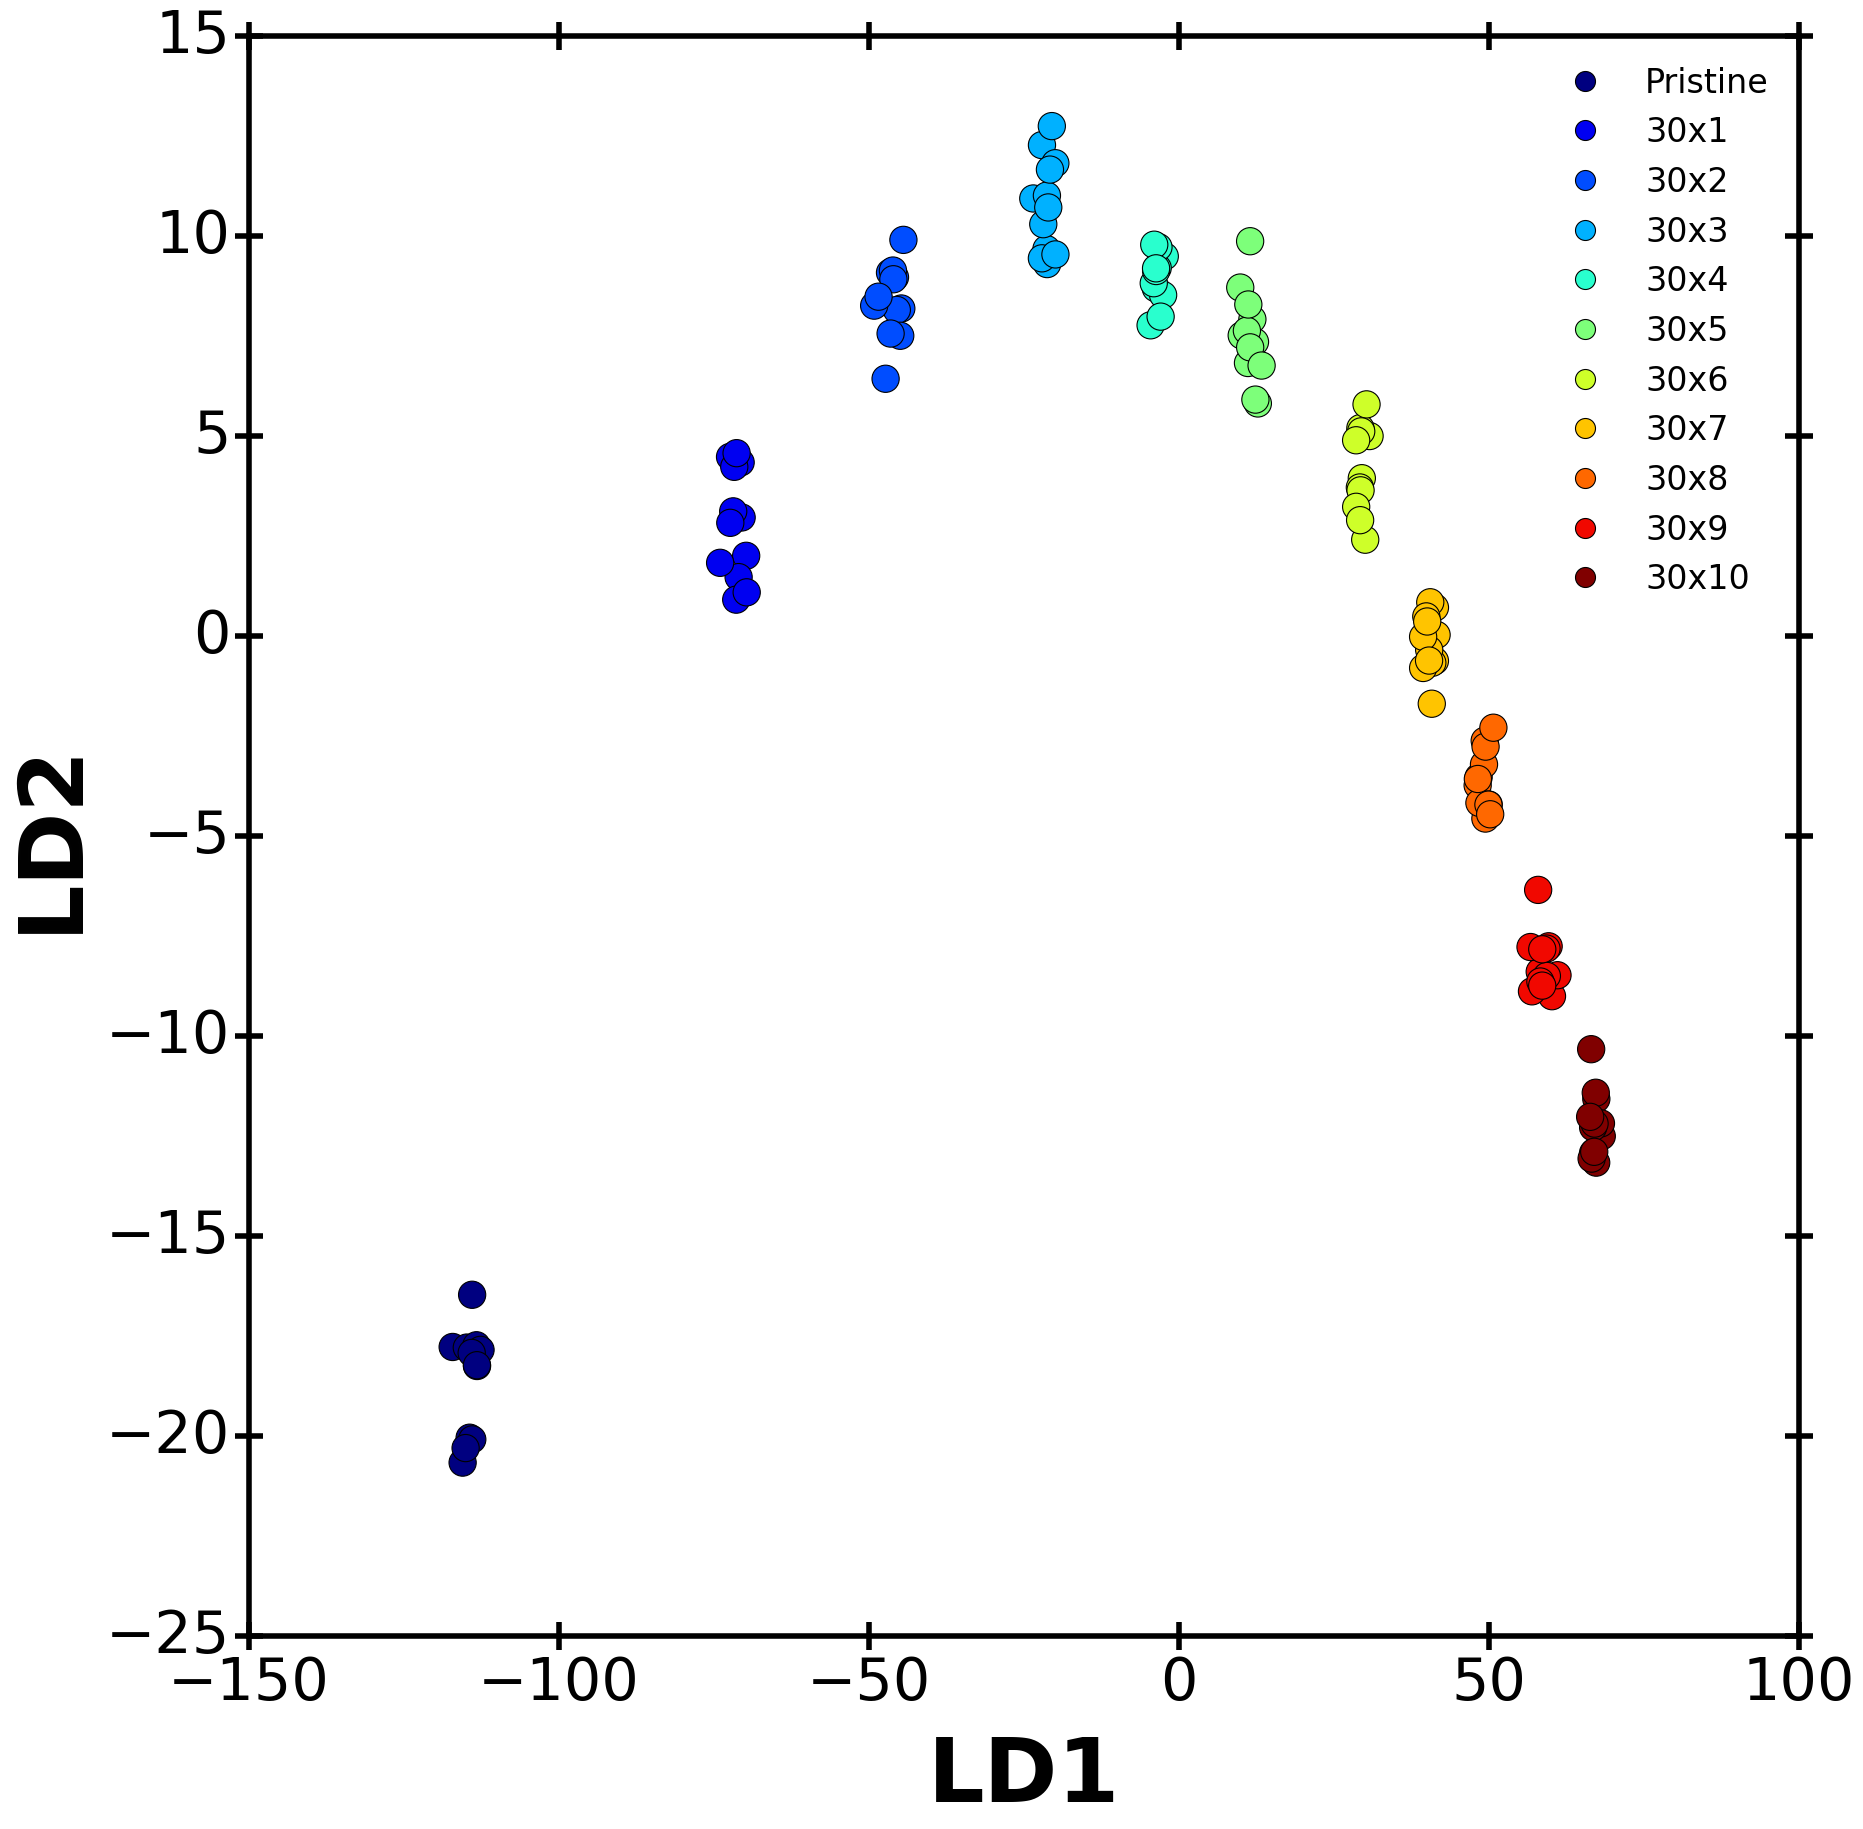

In [19]:
#Plot LDA scores
import matplotlib.pyplot as plt

plt.style.use('classic')

plt.figure(facecolor='white', figsize=(25, 25))
plt.rc('axes', linewidth = 5)

plt.xlabel('LD1', labelpad = 20, fontsize=80, fontweight='semibold')
plt.ylabel('LD2', labelpad = 10, fontsize=80, fontweight='semibold')
plt.xticks(fontsize = 53)
plt.yticks(fontsize = 53)
plt.tick_params(width = 5, length = 25, direction = 'inout')
scatter = plt.scatter(
    Xlda[:,0],
    Xlda[:,1],
    cmap='jet',
    c=y,
    s=600,
    edgecolors='k',
    )


classes = ['Pristine', '30x1', '30x2', '30x3', '30x4', '30x5', '30x6', '30x7', '30x8', '30x9', '30x10']


plt.legend(numpoints=1, handles=scatter.legend_elements()[0], labels=classes, markerscale = 3, frameon = False, fontsize = 30, loc = 'best')


plt.savefig('TEST.png')

#DEFINE METHOD TO EVALUATE MODEL
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#EVALUATE MODEL
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

#Results
percent = (np.mean(scores))*100
print('The mean accuracy is: {}%'.format(percent))

print('Explained variation per linear discriminant: {}'.format(lda.explained_variance_ratio_))

In [20]:
# Upload CSV with pca scores from unknown sample or samples and have it read/predicted automatically

unk = pd.read_csv('pca_scoresKellenDataAll-TEST.csv', header=None)

lda.transform(unk)
lda.predict(unk)

print('The predicted group for the unknown sample is: Group{}'.format(lda.predict(unk)))

The predicted group for the unknown sample is: Group[ 8  2  1 11  1  7 11  7  2  9  1  9 11  1  1  1  7 11  1  1 11  1  8  5
  1  1  9  7 11  1  1  1  1  9  1  4  8  2  2  9 11  5  9  1  9  2  9  7
  6 11  1  6  9  2  1  9  2 11  8  3  7 11  1  9  5  3]
